<a href="https://colab.research.google.com/github/2025-02-FML-team/WV-Team/blob/main/notebooks/02_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석
mathpltlib / seaborn등의 툴을 이용해서 데이터 특성을 알아보고 분류 계획을 세웁니다.

In [ ]:
# Import
import os

# Data Handling
from pathlib import Path
import numpy as np
import pandas as pd

# Display
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 맥에서 기본적으로 한글 지원되는 폰트 목록 중 하나
#font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"

#rc('font', family=font_manager.FontProperties(fname=font_path).get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 스타일 설정
plt.style.use("seaborn-v0_8-whitegrid")

data_dir = Path(os.path.join(os.getcwd(), "../data/")).resolve()
data_dir

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data')

In [3]:
csv_dir = data_dir / 'whiskies_filtered.csv'
csv_dir

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data/whiskies_filtered.csv')

In [4]:
df = pd.read_csv(csv_dir)
df.head()

,id,name,name_eng,category,volume,alcohol,price,brand,nation,bottled,region,region_detail,distillery,importer,external_image_url,image_url,full_image_url,local_full_path
0,11201699,카발란 콘서트마스터 포트 캐스크 피니시,Kavalan Concertmaster Port Cask Finish,Single Malt,700,40.0,173000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...
1,11201700,카발란 콘서트마스터 포트 캐스크 피니시 1L,Kavalan Concertmaster Port Cask Finish 1L,Single Malt,1000,40.0,200000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...
2,11201701,카발란 콘서트마스터 셰리 캐스크 피니시,Kavalan Concertmaster Sherry Cask Finish,Single Malt,700,40.0,204000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...
3,11201703,카발란 킹 카 컨덕터,Kavalan King Car Conductor,Single Malt,700,46.0,190000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...
4,11201706,카발란 포디움,Kavalan Podium,Single Malt,700,46.0,229000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...


In [5]:
# 전체 열 목록
cols = df.columns.tolist()

# 숫자형과 범주형 분리
num_cols = df.select_dtypes(include=np.number).columns.drop([
    'id', 
    'bottled',
    'importer'
], errors="ignore")
cat_cols = df.select_dtypes(exclude=np.number).columns.drop([
    'name', 
    'name_eng',
    'external_image_url', 
    'image_url', 
    'full_image_url',
    'name_eng-2'
], errors="ignore")

print("📊 숫자형 특성:", list(num_cols))
print("🏷️ 범주형 특성:", list(cat_cols))

📊 숫자형 특성: ['volume', 'alcohol', 'price']
🏷️ 범주형 특성: ['category', 'brand', 'nation', 'region', 'region_detail', 'distillery', 'local_full_path']


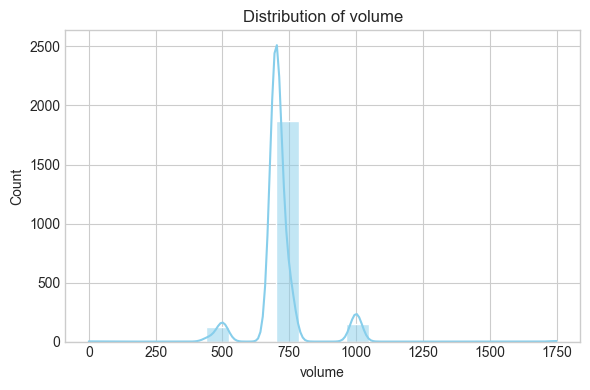

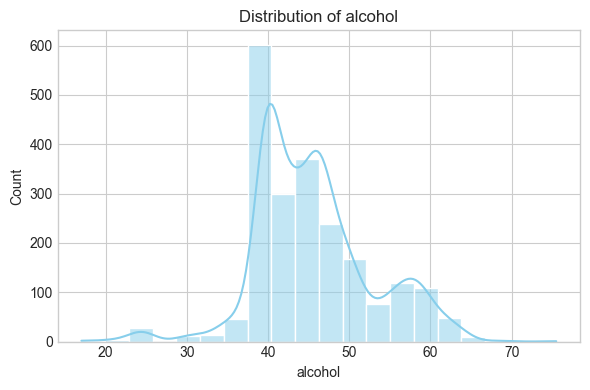

In [6]:
for col in num_cols:
    if('price' == col):
        continue
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue", edgecolor="white")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

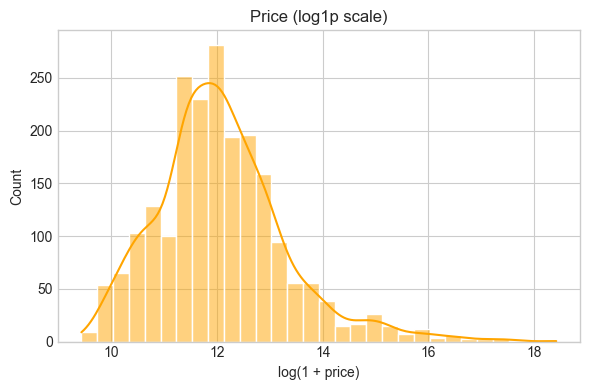

In [7]:
# price는 로그 스케일로 시각화
if "price" in df.columns:
    plt.figure(figsize=(6, 4))
    
    # 0 이하 값은 로그 불가 → 제거
    price_series = df["price"][df["price"] > 0]
    
    sns.histplot(np.log1p(price_series), bins=30, kde=True, color="orange", edgecolor="white")
    plt.title("Price (log1p scale)")
    plt.xlabel("log(1 + price)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

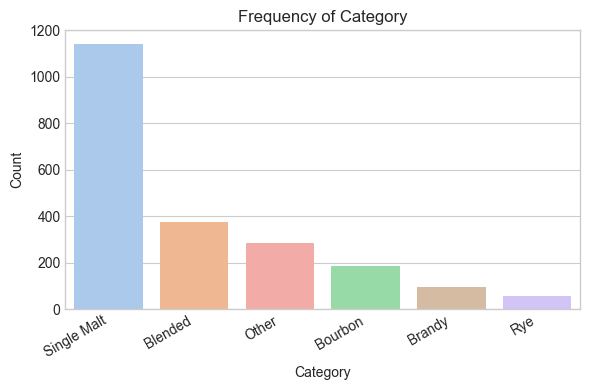

In [8]:
plt.figure(figsize=(6, 4))
order = df["category"].value_counts().index  # 빈도순 정렬
sns.countplot(
    x="category",
    hue="category",
    data=df,
    order=order,
    palette="pastel",
    legend=False
)
plt.title("Frequency of Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [9]:
# 도수 기준 구간 설정
bins = [0, 40, 43, 46, 100]  # 
labels = ["<40", "40–43", "43–46", "46+"]

df["alcohol_group"] = pd.cut(df["alcohol"], bins=bins, labels=labels, right=False)

# 결과 확인
print(df[["alcohol", "alcohol_group"]].head(10))
print("\n도수 구간별 개수:\n", df["alcohol_group"].value_counts())

   alcohol alcohol_group
0     40.0         40–43
1     40.0         40–43
2     40.0         40–43
3     46.0           46+
4     46.0           46+
5     50.0           46+
6     50.0           46+
7     50.0           46+
8     55.0           46+
9     50.0           46+

도수 구간별 개수:
 alcohol_group
46+      1014
40–43     596
43–46     378
<40       157
Name: count, dtype: int64


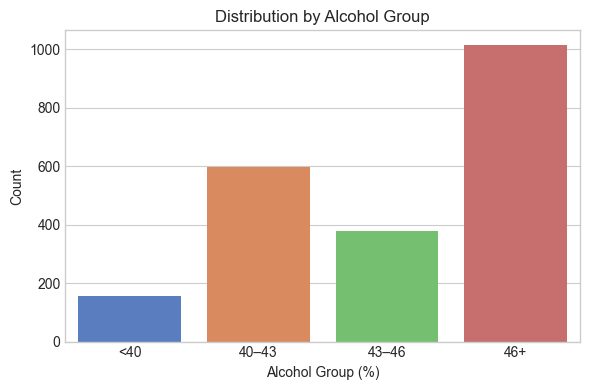

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="alcohol_group",
    hue="alcohol_group",
    data=df,
    order=labels,
    palette="muted"
)
plt.title("Distribution by Alcohol Group")
plt.xlabel("Alcohol Group (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
#모델용
bin_token_map = {
    "<40": "SM_B40",
    "40–43": "SM_40_43",
    "43–46": "SM_43_46",
    "46+": "SM_G46",
}

df["new_category"] = np.where(
    df["category"].eq("Single Malt"),
    df["alcohol_group"].map(bin_token_map).astype(str),
    df["category"]
)

print(df[["category", "alcohol", "alcohol_group", "new_category"]].head(10))

      category  alcohol alcohol_group new_category
0  Single Malt     40.0         40–43     SM_40_43
1  Single Malt     40.0         40–43     SM_40_43
2  Single Malt     40.0         40–43     SM_40_43
3  Single Malt     46.0           46+       SM_G46
4  Single Malt     46.0           46+       SM_G46
5  Single Malt     50.0           46+       SM_G46
6  Single Malt     50.0           46+       SM_G46
7  Single Malt     50.0           46+       SM_G46
8  Single Malt     55.0           46+       SM_G46
9  Single Malt     50.0           46+       SM_G46


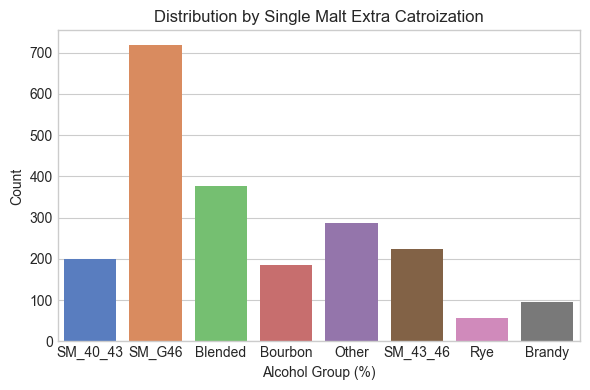

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="new_category",
    hue="new_category",
    data=df,
    palette="muted"
)
plt.title("Distribution by Single Malt Extra Catroization")
plt.xlabel("Alcohol Group (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
print("카테고리별 개수:\n", df["new_category"].value_counts())

카테고리별 개수:
 new_category
SM_G46      718
Blended     376
Other       286
SM_43_46    225
SM_40_43    200
Bourbon     186
Brandy       96
Rye          58
Name: count, dtype: int64


In [17]:
#swap
df['category'] = df["new_category"]
df.drop('new_category', axis=1)

,id,name,name_eng,category,volume,alcohol,price,brand,nation,bottled,region,region_detail,distillery,importer,external_image_url,image_url,full_image_url,local_full_path,alcohol_group
0,11201699,카발란 콘서트마스터 포트 캐스크 피니시,Kavalan Concertmaster Port Cask Finish,SM_40_43,700,40.0,173000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...,40–43
1,11201700,카발란 콘서트마스터 포트 캐스크 피니시 1L,Kavalan Concertmaster Port Cask Finish 1L,SM_40_43,1000,40.0,200000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...,40–43
2,11201701,카발란 콘서트마스터 셰리 캐스크 피니시,Kavalan Concertmaster Sherry Cask Finish,SM_40_43,700,40.0,204000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...,40–43
3,11201703,카발란 킹 카 컨덕터,Kavalan King Car Conductor,SM_G46,700,46.0,190000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...,46+
4,11201706,카발란 포디움,Kavalan Podium,SM_G46,700,46.0,229000,Kavalan,대만,NaN,NaN,NaN,Kavalan,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/1120...,/Volumes/Backup/Workspace/ML/WV-Team/data/1120...,46+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,20101527,에피큐리언 CS 글래스고 에디션,The Epicurean CS Glasgow Edition,Blended,700,56.8,175000,The Epicurean,스코틀랜드,NaN,로우랜드,NaN,Glasgow,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/co...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/2010...,/Volumes/Backup/Workspace/ML/WV-Team/data/2010...,46+
2141,40301195,발레앙 테시니에 오다주,Vallein Tercinier Hors D Age,Brandy,700,42.0,371900,Vallein Tercinier,프랑스,NaN,꼬냑,NaN,NaN,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/4030...,/Volumes/Backup/Workspace/ML/WV-Team/data/4030...,40–43
2142,40301196,발레앙 테시니에 VSOP,Vallein Tercinier VSOP,Brandy,700,40.0,89000,Vallein Tercinier,프랑스,NaN,꼬냑,NaN,NaN,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/4030...,/Volumes/Backup/Workspace/ML/WV-Team/data/4030...,40–43
2143,40301197,발레앙 테시니에 XO,Vallein Tercinier XO,Brandy,700,40.0,258000,Vallein Tercinier,프랑스,NaN,꼬냑,NaN,NaN,NaN,https://d1e2y5wc27crnp.cloudfront.net/media/sm...,https://cdn.whisket.co.kr/public/whiskies_dsh/...,https://cdn.whisket.co.kr/public/whiskies/4030...,/Volumes/Backup/Workspace/ML/WV-Team/data/4030...,40–43


In [18]:
new_csv_dir = data_dir / 'whiskies_recategorized.csv'
new_csv_dir

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data/whiskies_recategorized.csv')

In [19]:
df.to_csv(new_csv_dir, index=False)